In [1]:
import numpy as np, random

def objective(x):
    return sum(i**2 for i in x)

def random_antibody(bounds):
    antibody = []
    for low, high in bounds:
        antibody.append(random.uniform(low, high))
    return antibody

def mutate(antibody, rate, bounds):
    new = []
    for g, (low, high) in zip(antibody, bounds):
        if random.random() < rate:
            g += np.random.normal(0, 0.1*(high-low))
            g = np.clip(g, low, high)
        new.append(g)
    return new

def clonal_selection(objective, bounds, n_pop=15, n_gen=10, n_clones=5, rate=0.2):
    population = [random_antibody(bounds) for _ in range(n_pop)]
    history, best_scores = [], []

    for _ in range(n_gen):
        population.sort(key=objective)
        best = population[0]
        history.append(best)
        best_scores.append(objective(best))

        clones = []
        for antibody in population:
            for _ in range(n_clones):
                clones.append(mutate(antibody, rate, bounds))

        clones.sort(key=objective)
        population = clones[:n_pop]

    return history, best_scores

# Parameters
bounds = [(-5, 5), (-5, 5)]
history, best_scores = clonal_selection(objective, bounds)

print("Best Solution:", history[-1])
print("Best Fitness:", best_scores[-1])

Best Solution: [np.float64(0.0029708243268346535), np.float64(-0.00532332819434142)]
Best Fitness: 3.716362024558286e-05


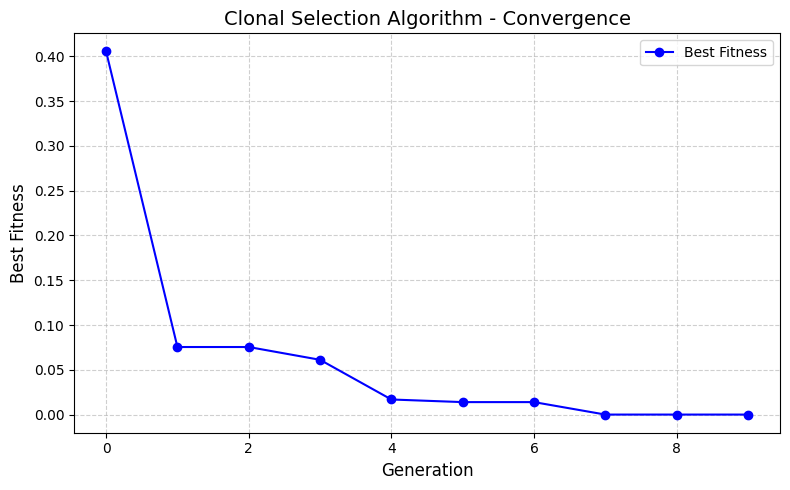

In [3]:
import matplotlib.pyplot as plt


def plot_convergence(best_scores):
    plt.figure(figsize=(8, 5))
    plt.plot(best_scores, marker='o', linestyle='-', color='blue', label='Best Fitness')
    plt.title("Clonal Selection Algorithm - Convergence", fontsize=14)
    plt.xlabel("Generation", fontsize=12)
    plt.ylabel("Best Fitness", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()


plot_convergence(best_scores)